In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(245, 255, 3)),

    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),

    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate =0.00005)

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', ])




In [34]:
import pickle as pkl
import os
import gc

results = []

#Load test set
with open('D:\\dalle_classifier\\test_batch\\' + 'test_batch.pickle', 'rb') as f:
    test = pkl.load(f)

for epoch in range(10):
    total = 0
    
    #Load train set
    batch_path = 'D:\\dalle_classifier\\train_batches\\'
    for batch in os.listdir(batch_path):
        with open(batch_path + batch , 'rb') as f:
            train = pkl.load(f)
        
        #Train model
        
        hh = model.fit(train[0], train[1], epochs=1, validation_data= (test[0], test[1]))
        gc.collect()
        keras.backend.clear_session()
        
        
        #Save results
        results.append([ hh.history['val_accuracy'][0], hh.history['accuracy'][0]])
        


In [33]:

# model.save('D:\\dalle_classifier\\model.h5')
# with open('D:\\dalle_classifier\\accuracy.pickle', 'wb') as f:
#     pkl.dump(results, f)


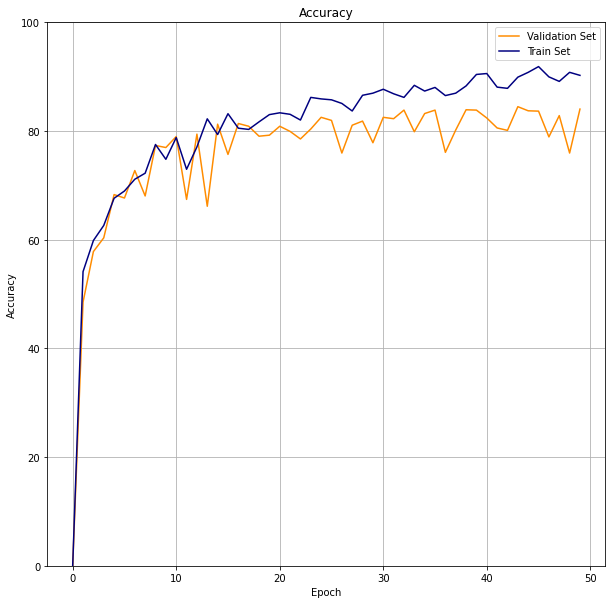

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
plt.title('Accuracy')

plt.plot([i for i in range(len(results)+1)],[0] + [i[0]*100 for i in results],color='darkorange', label = 'Validation Set')
plt.plot( [i for i in range(len(results)+1)], [0] + [i[1]*100 for i in results],color='navy', label = 'Train Set')

plt.grid()
plt.legend()
plt.ylim(0,100)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

<AxesSubplot:>

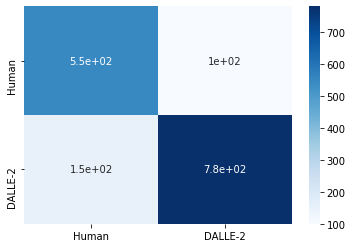

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


y_pred = np.round(model.predict(test[0]))
y_true = test[1]


# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define labels
labels = ['Human', 'DALLE-2']

# Create heatmap with labels
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)


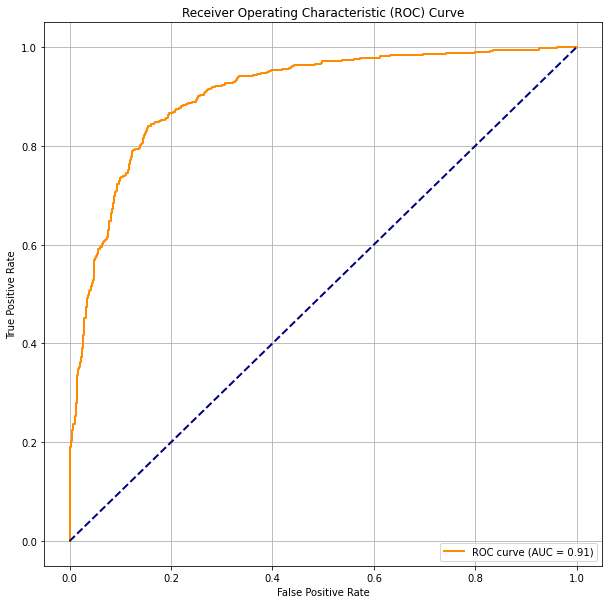

In [52]:
from sklearn.metrics import roc_curve, auc

# Example true and predicted labels and probabilities
y_pred_proba = model.predict(test[0])

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [85]:
test_files[0][100]

'd_digital_art_721.png'

In [86]:
print(y_pred_proba[100])

[0.13575792]
